# Exercise

## Objective
Repeat the process we did, with a different feature to predict MPG and compare the results.

## Feature Selection
Use the `weight` column as the independent variable (`x`) to predict `mpg` (dependent variable, `y`).

## Tasks
1. Preprocess the data to handle any missing values.
2. Split the dataset into training and testing sets.
3. Train a linear regression model using `weight` as the feature and `mpg` as the target.
4. Calculate the slope (`w`) and y-intercept (`b`) of the line of best fit.
5. Plot the training data, testing data, and the best-fitting line.
6. Make predictions on the test set.
7. Calculate the **MAE**, **MSE**, and **RMSE** for this model.
8. Compare the metrics with the original model using `horsepower`.

## Questions for Reflection
1. Which feature (`horsepower` or `weight`) resulted in a better prediction of MPG? Justify your answer using the evaluation metrics.
2. How does the interpretation of the slope differ between the two models?



#### Preprocess

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# load dataset mpg from sns
mpg = sns.load_dataset('mpg')

In [3]:
# data preprocessing
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [4]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [5]:
mpg = mpg.dropna()

In [6]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


In [7]:
#choose X and y, and reshape
X = mpg['weight'].values.reshape(-1, 1)
y = mpg['mpg'].values.reshape(-1, 1)

In [8]:
# split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

#### Train 

In [9]:
# create a model variable
model = LinearRegression()

In [10]:
#fit the data to the model
model.fit(X_train, y_train)

LinearRegression()

In [11]:
# get the slope (w) and y-interecept (b) from our mode
w = model.coef_[0][0]
print(f"Weights: {w}")

b = model.intercept_[0]
print(f"Bias: {b}")

print(f"The function is y = {w:.2f}x - {b:.2f}")

Weights: -0.0077631897076224435
Bias: 46.61530915383052
The function is y = -0.01x - 46.62


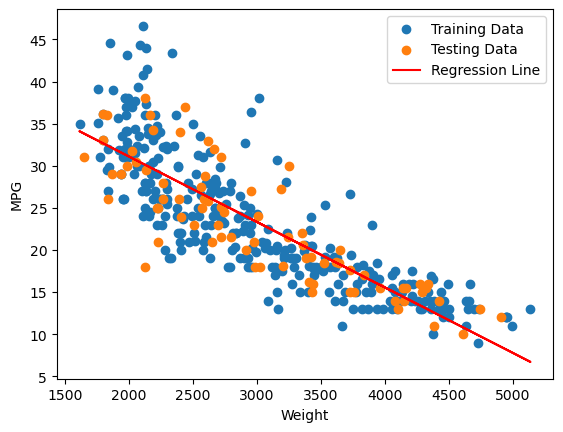

In [12]:
# plot the line of best fit
plt.scatter(X_train, y_train, label = 'Training Data')
plt.scatter(X_test, y_test, label = 'Testing Data')
plt.plot(X_train, model.predict(X_train), color = 'r', label = 'Regression Line')
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.legend()
plt.show()

In [13]:
# make a prediction 
y_pred = model.predict(X_test)

y_pred

#### Assess

In [14]:
# check prediction
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [15]:
# calculate the MAE, MSE, and RSME
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [16]:
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")

Mean Squared Error: 14.71
Mean Absolute Error: 2.94
Root Mean Squared Error: 3.84
